In [1]:
#import functions


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#from dython import nominal

%matplotlib inline

In [3]:
#set rules for columns

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#import files

In [7]:
df = pd.read_csv('/Users/segre/OneDrive/Desktop/IRONHACK/13.01.21/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')


In [8]:
#check columns names and data for each one

In [9]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
#clean columns titles

In [12]:
df.columns = [e.lower().replace(' ', '_') for e in df.columns]

In [13]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
df = df.rename({'employmentstatus': 'employment_status'}, axis='columns')

In [15]:
#check for info

In [16]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [17]:
#Which columns are numerical

In [18]:
numerical = df.select_dtypes(include = np.number)

In [19]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [20]:
#get categorical values

In [21]:
categorical = df.select_dtypes(include = np.object)

In [22]:
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [23]:
#START CLEANING

In [24]:
#Check for null values
#heatmap

<AxesSubplot:>

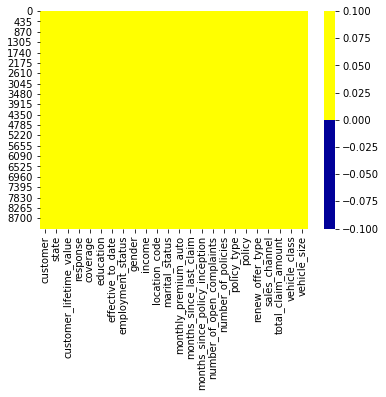

In [25]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [26]:
#second check for sum of NAN values. There is none

In [27]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [28]:
#Percentage of 0s per columns

In [29]:
round(df.isin([0]).sum()/len(df),4)*100

customer                          0.00
state                             0.00
customer_lifetime_value           0.00
response                          0.00
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employment_status                 0.00
gender                            0.00
income                           25.37
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           3.44
months_since_policy_inception     0.91
number_of_open_complaints        79.40
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     0.00
vehicle_size                      0.00
dtype: float64

In [30]:
#there are not nulls and the 0's that are present make sense

In [31]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [32]:
#are there rows there are exactly the same and we can drop?

In [33]:
df = df.rename(columns= {'customer':'id'})

In [34]:
#df_w_out_dubles = df.drop('id', axis=1).drop_duplicates()

In [35]:
df_w_out_dubles =df

In [36]:
df.shape

(9134, 24)

In [37]:
df_w_out_dubles.shape

(9134, 24)

In [38]:
df_w_out_dubles

,id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [39]:
#some rows where dropped, cannot be that the entries were exactly the same. 
#I will continue with df_w_out_duples, the unique customer ID is not needed for the model anyway!

In [40]:
#can there be inconsisten capitalization leading to miscount? I will check state, education,coverage,

In [41]:
df_unique = df_w_out_dubles.select_dtypes(exclude=['int', 'float'])
for col in df_unique.columns:
    print(df_unique[col].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
[56274     0 48767 ... 66367 71941 21941]
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
[ 69  94 108

In [42]:
#all the spellings appear to be correct for categorical values

In [43]:
#FORMAT CHECKS --> dates

In [44]:
df_w_out_dubles['effective_to_date'] = pd.to_datetime(df_w_out_dubles['effective_to_date'], errors='coerce')
df_w_out_dubles['effective_to_date'].dtype

dtype('<M8[ns]')

In [45]:
#NORMALITY CHECK --> checking for outliers

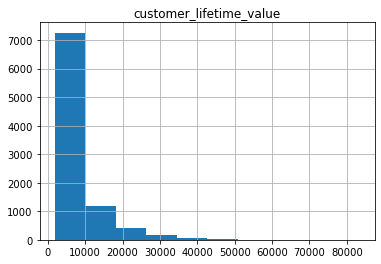

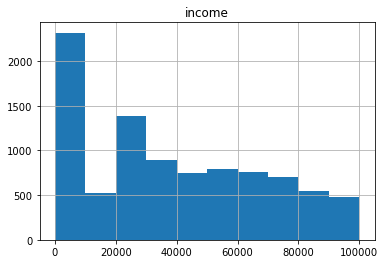

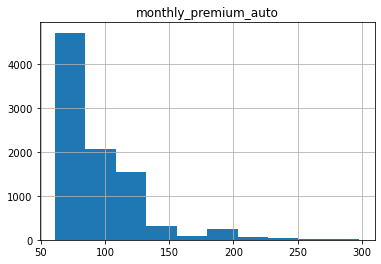

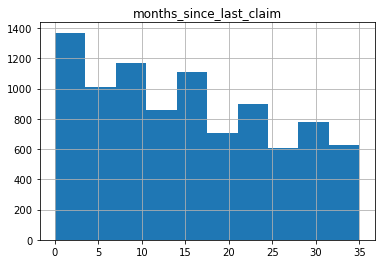

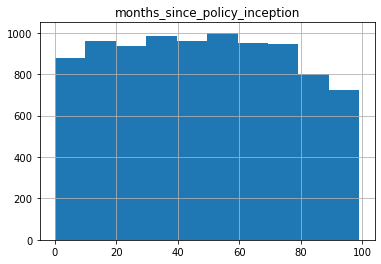

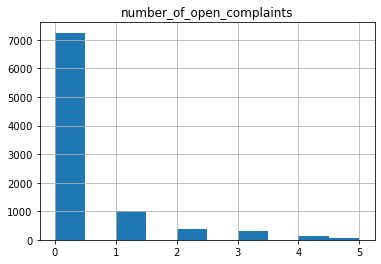

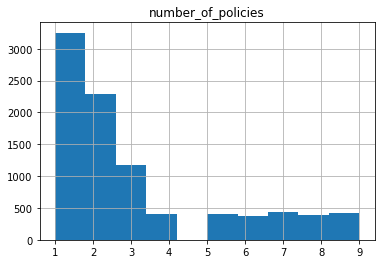

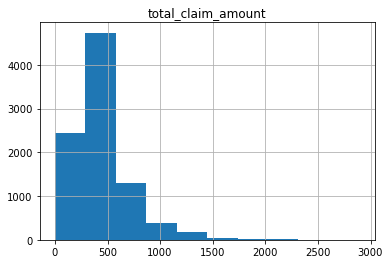

In [46]:
#(map(numerical.hist(), numerical.columns))
for x in numerical.columns:
    numerical.hist(x)
plt.show()

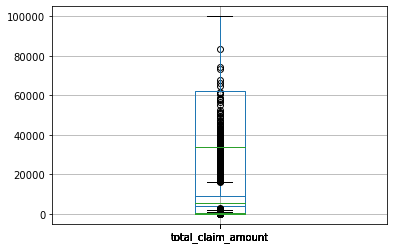

In [47]:
for x in numerical.columns:
    numerical.boxplot(x)
plt.show()

In [48]:
numerical.describe(include='all')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [49]:
#the customer lifetime value and the total claim amount have a huge difference between the max and the 75th percentile

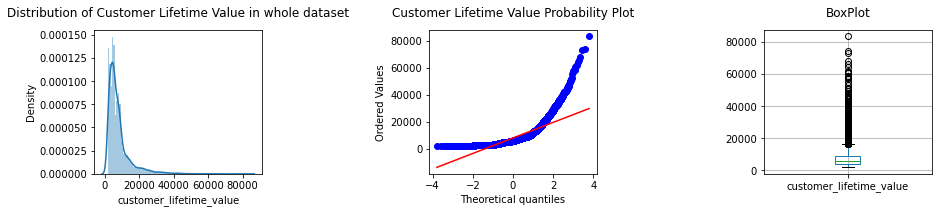

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,2))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=1, hspace=None)

sns.distplot(df_w_out_dubles['customer_lifetime_value'], hist=True, bins = 100, ax=ax1)
probplot(df_w_out_dubles['customer_lifetime_value'], plot=ax2)
df_w_out_dubles.boxplot('customer_lifetime_value', ax=ax3)

ax1.set_title('Distribution of Customer Lifetime Value in whole dataset', size=12, y=1.05)
ax2.set_title('Customer Lifetime Value Probability Plot', size=12, y=1.05)
ax3.set_title('BoxPlot', size=12, y=1.05)

plt.show()

In [51]:
#total claim amount

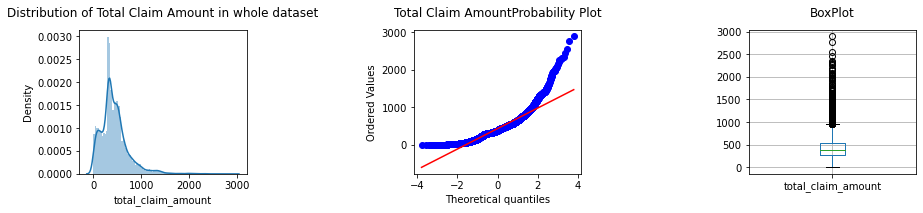

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,2))
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=1, hspace=None)

sns.distplot(df_w_out_dubles['total_claim_amount'], hist=True, bins = 100, ax=ax1)
probplot(df_w_out_dubles['total_claim_amount'], plot=ax2)
df_w_out_dubles.boxplot('total_claim_amount', ax=ax3)

ax1.set_title('Distribution of Total Claim Amount in whole dataset', size=12, y=1.05)
ax2.set_title('Total Claim AmountProbability Plot', size=12, y=1.05)
ax3.set_title('BoxPlot', size=12, y=1.05)

plt.show()

In [53]:
#checking total claim amount, outliers

In [54]:
df_claimed= df_w_out_dubles[(df_w_out_dubles['total_claim_amount'] > 2400)] 
df_claimed

,id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
888,BZ65376,Arizona,8581.278701,No,Extended,Bachelor,2011-01-18,Medical Leave,M,27689,Suburban,Married,239,0,72,2,1,Personal Auto,Personal L2,Offer2,Web,2893.239678,Luxury SUV,Medsize
4930,IV94496,Nevada,43217.216110,No,Extended,High School or Below,2011-01-27,Employed,M,51504,Suburban,Single,220,30,99,0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize
5074,ZD75163,Nevada,9295.411150,No,Premium,High School or Below,2011-02-14,Unemployed,M,0,Suburban,Single,261,33,44,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize
9049,UZ14076,California,32104.699570,No,Premium,High School or Below,2011-02-16,Employed,F,89546,Suburban,Married,266,4,18,1,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large


In [55]:
#we keep them all

In [56]:
#outliers removal for customer lifetime value

In [57]:
iqr = np.percentile(df_w_out_dubles['customer_lifetime_value'],75) - np.percentile(df_w_out_dubles['customer_lifetime_value'],25)
upper_limit = np.percentile(df_w_out_dubles['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(df_w_out_dubles['customer_lifetime_value'],25) - 1.5*iqr

In [58]:
df_duples_percentile = df_w_out_dubles[(df_w_out_dubles['customer_lifetime_value']>lower_limit) & (df_w_out_dubles['customer_lifetime_value']<upper_limit)]

In [59]:
#CHECKING FOR ASSOCIATION categorical aka whattodrop?

In [60]:
#not able to import from here https://github.com/shakedzy/dython/blob/master/dython/nominal.py
#assoc = nominal.associations(df, nominal_columns=['Month','Day'], plot=False, return_results=True)
#sns.heatmap(assoc, annot=True, fmt='.2f')

In [61]:
#Checking for correlation

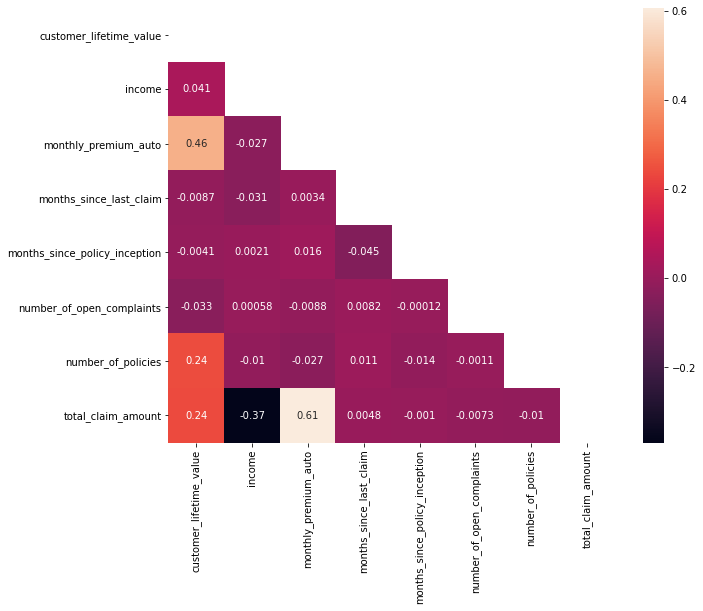

In [62]:
correlations_matrix = df_duples_percentile.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [63]:
#nothing to drop

In [64]:
#Checking for skewness and relevance of numerical features

In [65]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [66]:
#first I will check our target variable, total_claim_amount

In [67]:
from scipy import stats

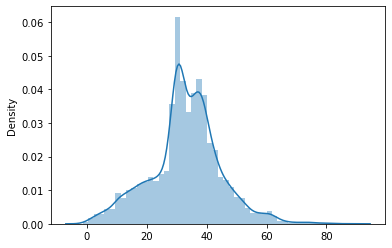

In [68]:
xt, lmbda = stats.boxcox(numerical['total_claim_amount'])
sns.distplot(xt)
plt.show()

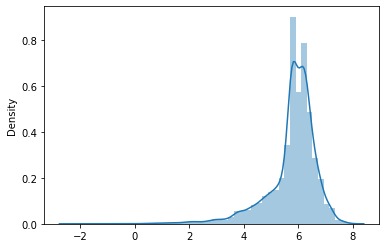

In [69]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
claim_log = list(map(log_transfom_clean, numerical['total_claim_amount']))
sns.distplot(claim_log)
plt.show()

In [70]:
#box cox is the most normal, we use that

In [71]:
#apply 
numerical['total_claim_amount_transf'] = xt

In [72]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,total_claim_amount_transf
0,2763.519279,56274,69,32,5,0,1,384.811147,33.035752
1,6979.535903,0,94,13,42,0,8,1131.464935,56.357614
2,12887.431650,48767,108,18,38,0,2,566.472247,40.071789
3,7645.861827,0,106,18,65,0,7,529.881344,38.763252
4,2813.692575,43836,73,12,44,0,1,138.130879,19.560154


In [73]:
#income we do not need to transform

In [74]:
df_duples_percentile['employment_status'].value_counts()

Employed         5173
Unemployed       2116
Medical Leave     397
Disabled          374
Retired           257
Name: employment_status, dtype: int64

In [75]:
data_inc_unempl = df_duples_percentile[(df_duples_percentile['employment_status'].isin(['Unemployed'])) & (df_duples_percentile['income'] == 0)]
#data[(data['target_d']<100) & (data['gender']=='F')]
data_inc_unempl.shape

(2116, 24)

In [76]:
#checking other numericals

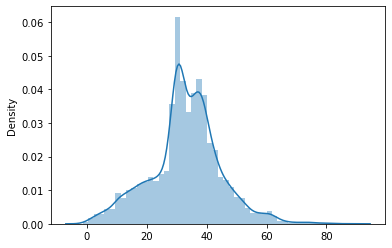

In [77]:
xt1, lmbda = stats.boxcox(numerical['customer_lifetime_value'])
sns.distplot(xt)
plt.show()

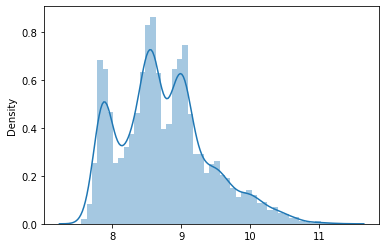

In [78]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
claim_log = list(map(log_transfom_clean, numerical['customer_lifetime_value']))
sns.distplot(claim_log)
plt.show()

In [79]:
numerical['customer_lifetime_transf'] = xt1

In [80]:
numerical.drop(['customer_lifetime_value','total_claim_amount'], axis=1, inplace = True)

In [81]:
numerical.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_transf,customer_lifetime_transf
0,56274,69,32,5,0,1,33.035752,2.703839
1,0,94,13,42,0,8,56.357614,2.754926
2,48767,108,18,38,0,2,40.071789,2.780772
3,0,106,18,65,0,7,38.763252,2.759125
4,43836,73,12,44,0,1,19.560154,2.704995


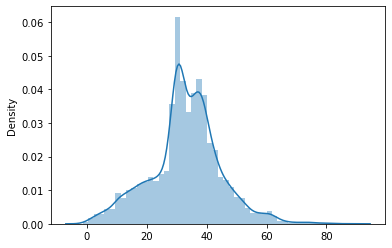

In [82]:
xt2, lmbda = stats.boxcox(numerical['monthly_premium_auto'])
sns.distplot(xt)
plt.show()

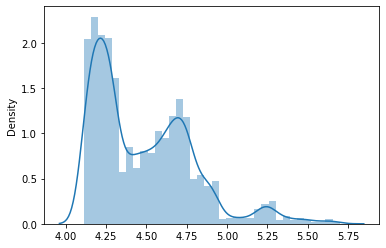

In [83]:
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 
claim_log = list(map(log_transfom_clean, numerical['monthly_premium_auto']))
sns.distplot(claim_log)
plt.show()

In [84]:
numerical['monthly_premium_auto_transf'] = xt2

In [85]:
numerical.drop(['monthly_premium_auto'], axis=1, inplace = True)

In [86]:
#Ordinal label encoder with pandas

In [87]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [88]:
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [89]:
#label encoding for education and coverage and cars

In [90]:
#work on categoricals

In [91]:
X_cat = pd.DataFrame()

In [92]:
X_cat[['state', 'response', 'coverage', 'education','employment_status', 'gender', 'location_code','marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_class', 'vehicle_size']] = categorical[['state', 'response', 'coverage', 'education','employment_status', 'gender', 'location_code','marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_class', 'vehicle_size']]
X_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [93]:
X_cat

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [94]:
ordcat_vehicle_c = pd.Categorical(X_cat['vehicle_class'], categories=['Two-Door Car', 'Four-Door Car', 'SUV', 'Sports Car', 'Luxury SUV', 'Luxury Car'], ordered=True)
ordcat_coverage = pd.Categorical(X_cat['coverage'], categories=['Basic', 'Extended', 'Premium'], ordered=True)
ordcat_education = pd.Categorical(X_cat['education'], categories=['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'], ordered=True)
ordcat_vehicle_size= pd.Categorical(X_cat['vehicle_size'], categories=['Small', 'Medsize', 'Large'], ordered=True)

In [95]:
fact_vehicle_class, unique = pd.factorize(ordcat_vehicle_c, sort=True)
X_cat['vehicle_class'] = fact_vehicle_class
fact_coverage, unique = pd.factorize(ordcat_coverage, sort=True)
X_cat['coverage'] = fact_coverage
fact_education, unique = pd.factorize(ordcat_education, sort=True)
X_cat['education'] = fact_education
fact_vehicle_size, unique = pd.factorize(ordcat_vehicle_size, sort=True)
X_cat['vehicle_size'] = fact_vehicle_size

In [96]:
X_cat

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,2,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,0,1
1,Arizona,No,1,2,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,1,1
2,Nevada,No,2,2,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,0,1
3,California,No,0,2,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,2,1
4,Washington,No,0,2,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,2,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,1,1
9130,California,Yes,1,1,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,1,1
9131,California,No,1,2,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,1,1
9132,California,No,1,1,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,1,2


In [97]:
#X_cat = X_cat.drop(['policy_type'], axis=1)

In [98]:
#X_cat["coverage"] = X_cat["coverage"].astype('category')

In [99]:
#X_cat["coverage_cat"] = X_cat["coverage"].cat.codes
#_cat.head()

In [100]:
#X_cat.drop(['coverage'], axis=1, inplace = True)

In [101]:
#X_cat["education"] = X_cat["education"].astype('category')

In [102]:
#X_cat["education_cat"] = X_cat["education"].cat.codes
#X_cat.head()

In [103]:
#X_cat.drop(['education'], axis=1, inplace = True)

In [104]:
#X_cat["vehicle_class"] = X_cat["vehicle_class"].astype('category')

In [105]:
#X_cat["vehicle_class_cat"] = X_cat["vehicle_class"].cat.codes
#X_cat.head()

In [106]:
#X_cat.drop(['vehicle_class'], axis=1, inplace = True)

In [107]:
#X_cat["vehicle_size"] = X_cat["vehicle_size"].astype('category')

In [108]:
#X_cat["vehicle_size_cat"] = X_cat["vehicle_size"].cat.codes
#X_cat.head()

In [109]:
#X_cat.drop(['vehicle_size'], axis=1, inplace = True)

In [110]:
#rest of variables OneHotEncoder

In [111]:
X_cat_hot = X_cat.select_dtypes(exclude = np.number)

In [112]:
pd.get_dummies(X_cat_hot, drop_first=True)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web
0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9130,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9131,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9132,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [113]:
enc = OneHotEncoder(handle_unknown='error', drop='first')
enc_data_1_cats = pd.DataFrame(enc.fit_transform(X_cat_hot[['state','response','employment_status','location_code','marital_status','gender','policy_type','policy','renew_offer_type','sales_channel']]).toarray())

In [114]:
X_cat_new = X_cat.drop(['state','response','employment_status','location_code','marital_status','gender','policy_type','policy','renew_offer_type','sales_channel'], axis=1)

In [115]:
X_cat_new

,coverage,education,vehicle_class,vehicle_size
0,0,2,0,1
1,1,2,1,1
2,2,2,0,1
3,0,2,2,1
4,0,2,1,1
...,...,...,...,...
9129,0,2,1,1
9130,1,1,1,1
9131,1,2,1,1
9132,1,1,1,2


In [116]:
data_1_cats = X_cat_new.join(enc_data_1_cats)

In [117]:
data_1_cats

,coverage,education,vehicle_class,vehicle_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,2,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,2,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9130,1,1,1,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,1,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,1,1,1,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [118]:
#enc = OneHotEncoder(handle_unknown='error', drop='first')
#enc_data_1_cats = pd.DataFrame(enc.fit_transform(X_cat[['state','response','employment_status','gender','location_code', 'marital_status','policy_type','renew_offer_type','sales_channel']]).toarray())
#X_cat = X_cat.join(enc_data_1_cats)
#X_cat

In [119]:
#drop all categoricals

In [120]:
#encoded = encoder.transform(X_cat).toarray()

In [121]:
#le = preprocessing.LabelEncoder().fit(X_cat).transform(X_cat)

In [122]:
#SCALING NUMERICAL

In [123]:
from sklearn.preprocessing import Normalizer

In [124]:
X_num = numerical

In [125]:
transformer = Normalizer().fit(X_num)
X_num_normalized = transformer.transform(X_num)
print(X_num_normalized.shape)

(9134, 8)


In [126]:
X_num_normalized = pd.DataFrame(X_num_normalized, columns = X_num.columns)

In [127]:
X_num_normalized.head()

,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_transf,customer_lifetime_transf,monthly_premium_auto_transf
0,1.000000,0.000569,0.000089,0.0,0.000018,0.000587,0.000048,0.000012
1,0.000000,0.180604,0.583489,0.0,0.111141,0.782953,0.038273,0.009529
2,0.999999,0.000369,0.000779,0.0,0.000041,0.000822,0.000057,0.000014
3,0.000000,0.230303,0.831649,0.0,0.089562,0.495960,0.035302,0.008777
4,0.999999,0.000274,0.001004,0.0,0.000023,0.000446,0.000062,0.000016


In [129]:
df_1 = pd.concat([data_1_cats, X_num_normalized], axis =1)
df_1.head()

,coverage,education,vehicle_class,vehicle_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_transf,customer_lifetime_transf,monthly_premium_auto_transf
0,0,2,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000569,0.000089,0.0,0.000018,0.000587,0.000048,0.000012
1,1,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.180604,0.583489,0.0,0.111141,0.782953,0.038273,0.009529
2,2,2,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.000369,0.000779,0.0,0.000041,0.000822,0.000057,0.000014
3,0,2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.230303,0.831649,0.0,0.089562,0.495960,0.035302,0.008777
4,0,2,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999999,0.000274,0.001004,0.0,0.000023,0.000446,0.000062,0.000016


In [130]:
#x and y split

In [131]:
Y_1= df_1['total_claim_amount_transf']
X_1 = df_1.drop(['total_claim_amount_transf'], axis=1)

In [132]:
#Train / Test Data

In [133]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, Y_1, test_size=0.3, random_state=0)

In [134]:
X_1_train.describe()

,coverage,education,vehicle_class,vehicle_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_lifetime_transf,monthly_premium_auto_transf
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,0.475207,1.302831,1.224621,0.908024,0.346942,0.092914,0.283904,0.092132,0.139215,0.623338,0.047552,0.031910,0.252776,0.633193,0.169248,0.579384,0.269826,0.491788,0.743626,0.041139,0.064133,0.112780,0.136712,0.230721,0.376193,0.007977,0.016268,0.016893,0.317222,0.158455,0.111685,0.282340,0.188487,0.143751,0.747222,0.059634,0.165107,0.001650,0.012332,0.011248,0.002812
std,0.654282,1.088807,1.026361,0.537970,0.476034,0.290335,0.450926,0.289235,0.346198,0.484587,0.212833,0.175774,0.434638,0.481971,0.375000,0.493697,0.443904,0.499972,0.436665,0.198627,0.245008,0.316348,0.343570,0.421327,0.484467,0.088967,0.126513,0.128882,0.465431,0.365195,0.315003,0.450173,0.391131,0.350864,0.434637,0.132599,0.310445,0.008518,0.030511,0.020739,0.005189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000010,0.000027,0.000007
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000168,0.000653,0.000000,0.000032,0.000044,0.000011
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999998,0.000421,0.001369,0.000000,0.000077,0.000081,0.000020
75%,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.001919,0.023243,0.000000,0.009487,0.024649,0.006193
max,2.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.859298,0.996387,0.118795,0.372885,0.178657,0.044359


In [135]:
#Modeling

In [136]:
lm = linear_model.LinearRegression()
lr_1 = lm.fit(X_1_train,y_1_train)
predictions_1  = lm.predict(X_1_test)
r2_score(y_1_test, predictions_1)

0.9819285968880922

In [143]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
X_1 = sm.add_constant(X_1)
model = sm.OLS(Y_1,X_1).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     total_claim_amount_transf   R-squared:                       0.982
Model:                                   OLS   Adj. R-squared:                  0.982
Method:                        Least Squares   F-statistic:                 1.263e+04
Date:                       Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                               22:49:02   Log-Likelihood:                 16825.
No. Observations:                       9134   AIC:                        -3.357e+04
Df Residuals:                           9094   BIC:                        -3.329e+04
Df Model:                                 39                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [ ]:
#Model Validation

In [146]:
mse = mean_squared_error(y_1_test, predictions_1)
print(mse)

0.0014413737853133442


In [148]:
import math
rmse = math.sqrt(mse)
print(rmse)

0.037965428817719735


In [149]:
r2 = r2_score(y_1_test, predictions_1)
r2

0.9819285968880922

In [152]:
n = len(X_1_test) 
p = X_1_test.shape[1]

In [153]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9816540776114756